Get stock data from yahoo finance library

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union



In [20]:
def get_stock(stock_symbol, start, end):
  stock_data = yf.download(stock_symbol, start=start, end=end)
  # print(stock_data)
  stock_data['Daily return'] = stock_data['Close'].pct_change()
  # drop NaN in daily return
  stock_data = stock_data.dropna()

  # expect return
  # expect_return = stock_data['Daily return'].mean()
  return stock_data



In [37]:
APPL_stock = get_stock('AAPL', start='2020-01-01', end='2025-01-01')
TSLA_stock = get_stock('TSLA', start='2020-01-01', end='2025-01-01')
GOOG_stock = get_stock('GOOG', start='2020-01-01', end='2025-01-01')
AMZN_stock = get_stock('AMZN', start='2020-01-01', end='2025-01-01')
MA_STOCK = get_stock('MA', start='2020-01-01', end='2025-01-01')




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  5 of 5 completed


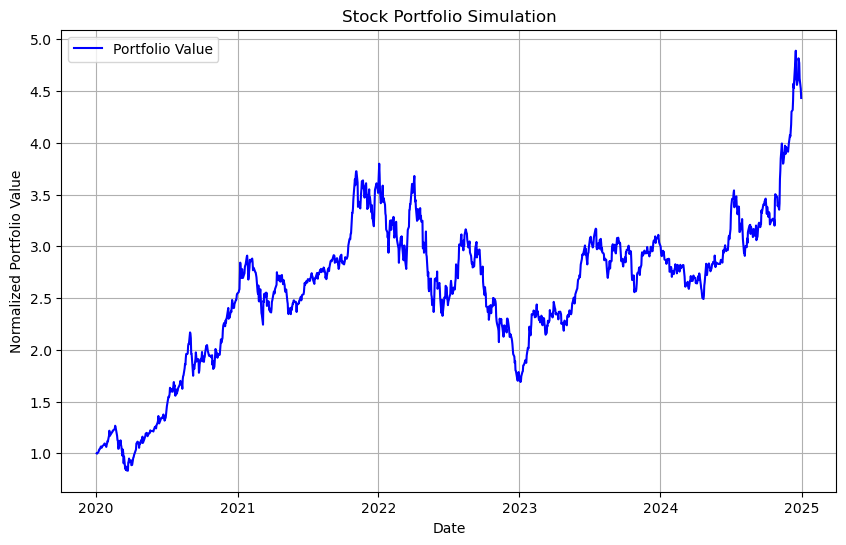

In [42]:
# Corrected stock tickers
stocks = ['AAPL', 'TSLA', 'GOOG', 'AMZN', 'MA']
weights = np.array([0.3, 0.2, 0.2, 0.15, 0.15])  # Portfolio weights

# Fetch adjusted closing prices
data = yf.download(stocks, start='2020-01-01', end='2025-01-01')['Close']

# Normalize the stock prices to start from 1
normalized_data = data / data.iloc[0]

# Calculate the portfolio performance
portfolio_value = normalized_data.dot(weights)

# Plot the portfolio performance
plt.figure(figsize=(10,6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.title('Stock Portfolio Simulation')
plt.xlabel('Date')
plt.ylabel('Normalized Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

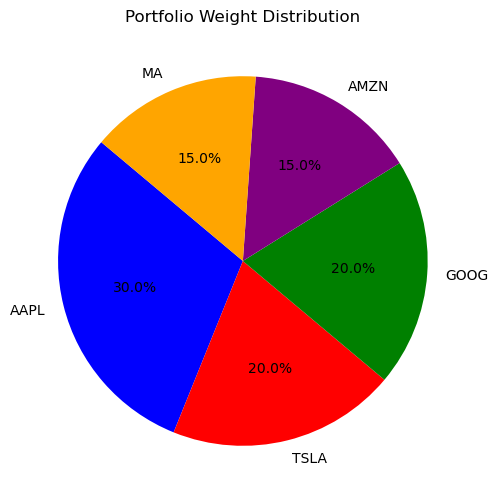

In [40]:
plt.figure(figsize=(6, 6))
plt.pie(weights, labels=stocks, autopct='%1.1f%%', colors=['blue', 'red', 'green', 'purple', 'orange'], startangle=140)
plt.title("Portfolio Weight Distribution")
plt.show()

In [26]:
p_win = 0
for ret in stock_data['Daily return']:
  if ret > 0: p_win += 1

p_win /= len(stock_data['Daily return'])
p_loss = 1 - p_win
print(p_win, p_loss)
print(len(stock_data))

0.5330151153540175 0.46698488464598253
1257


Plot for closing price

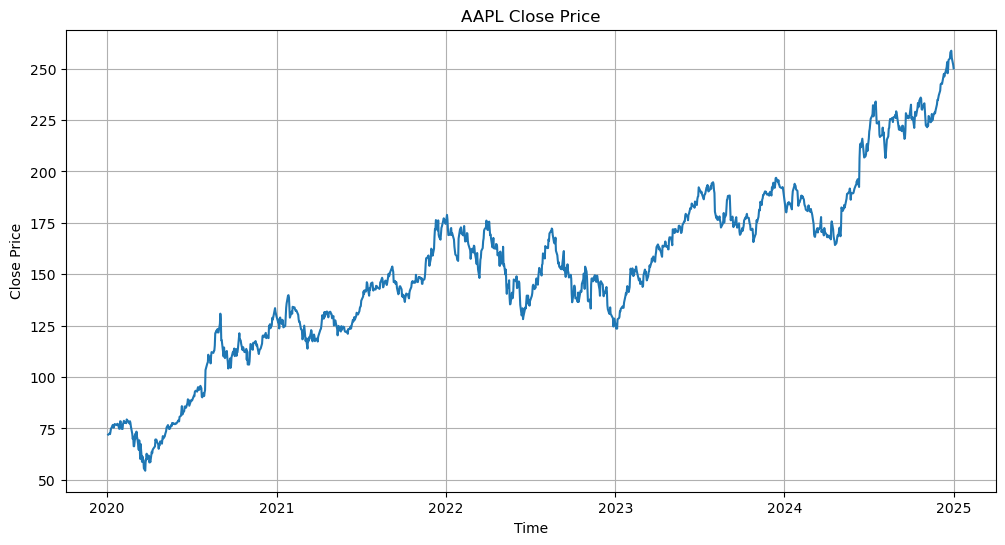

In [23]:
# plot Close price
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('AAPL Close Price')
plt.grid(True)
plt.show()


Plot for price change

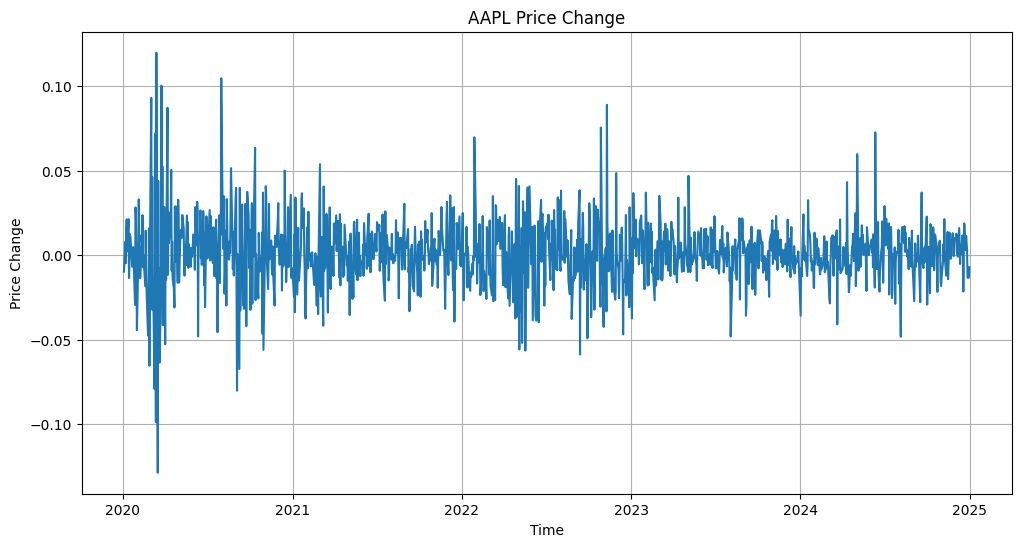

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, price_change)
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.title('AAPL Price Change')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kelly_formula(b, p, q):
    return (b * p - q) / b

periods = 365
p = len(pos_ret) / periods # probability of winning
q = 1 - p # probability of losing
b = np.mean(pos_ret) / abs(np.mean(neg_ret)) # compare win and lose
kelly_fraction = kelly_formula(b, p, q)

# Output the results
print(f"p (win rate): {p}")
print(f"q (loss rate): {q}")
print(f"b (risk/reward ratio): {b}")
print(f"Kelly fraction: {kelly_fraction}")
# backtesting process
# things containing in a new data frame
# kelly fraction per day, next day return, additional stats
new_df = pd.DataFrame(columns=["Kelly fraction per day"])
new_df["Next day returns"] = df['PriceChange'].shift(-1)
print(new_df)

# for i in range(len(returns)):
#   p = []
#   q = []
#   for ret in returns[0:i+1]:
#     if ret > 0: p.append(ret)
#     else: q.append(ret)
#   b = np.mean(p) / abs(np.mean(q))
#   kelly_value = get_kelly(df[['PriceChange']], window=300)
#   new_df.loc[i,"Kelly fraction per day"] = kelly_frac
# print(new_df)

# simulate expected growth rate
init_cap = 1000
capital = init_cap
portfolio_values = [capital]

# plt.plot(portfolio_values)
# plt.title("Portfolio Growth Using Kelly Criterion")
# plt.xlabel("Time (Days)")
# plt.ylabel("Portfolio Value")


p (win rate): 1.8356164383561644
q (loss rate): -0.8356164383561644
b (risk/reward ratio): 1.0298538317010253
Kelly fraction: 2.6470096794493823
           Kelly fraction per day  Next day returns
Date                                               
2020-01-03                    NaN          0.007968
2020-01-06                    NaN         -0.004703
2020-01-07                    NaN          0.016086
2020-01-08                    NaN          0.021241
2020-01-09                    NaN          0.002260
...                           ...               ...
2024-12-24                    NaN          0.003176
2024-12-26                    NaN         -0.013242
2024-12-27                    NaN         -0.013263
2024-12-30                    NaN         -0.007058
2024-12-31                    NaN               NaN

[1257 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed


Price      PriceChange
Ticker                
Date                  
2023-12-15    4.140929
2023-12-18    4.573220
2023-12-19    4.610722
2023-12-20    4.604214
2023-12-21    4.655062
2023-12-22    4.208404
2023-12-26    4.656017
2023-12-27    4.324435
2023-12-28    4.232822
2023-12-29    4.148184


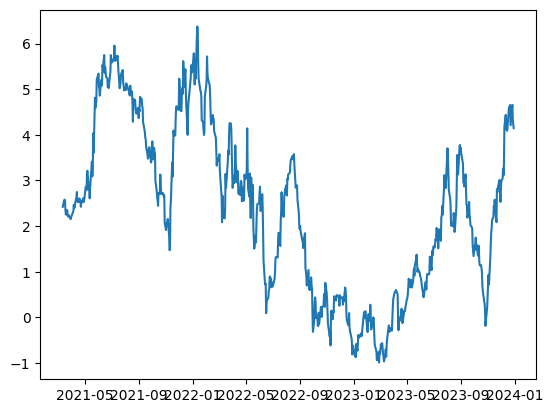

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from typing import Union

# 🔹 Step 1: Define the Kelly Criterion function
def get_kelly(
    returns: Union[pd.DataFrame, pd.Series],
    window: int = 1000,
    r: float = 0.02,
    correlation: bool = False,
    days: int = 250,
) -> pd.DataFrame:
    """Calculates the Kelly optimal investment fraction."""

    r_adjusted = (1 + r) ** (1 / days) - 1  # Convert annual risk-free rate to daily

    mean_returns = returns.rolling(window=window, min_periods=window).mean()
    excess_returns = mean_returns - r_adjusted

    if correlation:
        rolling_cov = returns.rolling(window=window, min_periods=window).cov()
        kelly = excess_returns.div(rolling_cov.groupby(level=0).mean())
    else:
        rolling_var = returns.rolling(window=window, min_periods=window).var()
        kelly = excess_returns / (rolling_var + 1e-8)  # Avoid division by zero

    return kelly

# 🔹 Step 2: Fetch historical stock data
ticker = "AAPL"  # Choose your stock symbol
df = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# 🔹 Step 3: Compute daily returns
df["PriceChange"] = df["Close"].pct_change()

# 🔹 Step 4: Compute Kelly Criterion
kelly_values = get_kelly(df[['PriceChange']], window=300)

# 🔹 Step 5: Display results
print(kelly_values.tail(10))  # Show last 10 values
plt.plot(kelly_values)
plt.show()


In [ ]:
# portfolio simulation
new_df["Next day returns"] = df['PriceChange'].shift(-1)
print(new_df["Next day returns"])
capital = 1000
capital = capital + kelly_values * new_df["Next day returns"]

Date
2020-01-03    0.007968
2020-01-06   -0.004703
2020-01-07    0.016086
2020-01-08    0.021241
2020-01-09    0.002261
                ...   
2024-12-24         NaN
2024-12-26         NaN
2024-12-27         NaN
2024-12-30         NaN
2024-12-31         NaN
Name: Next day returns, Length: 1257, dtype: float64


ValueError: cannot join with no overlapping index names